In [ ]:
!pip install neuralprophet[live]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 74 kB 2.5 MB/s 
     |████████████████████████████████| 172 kB 8.6 MB/s 
     |████████████████████████████████| 793 kB 18.3 MB/s 
     |████████████████████████████████| 793 kB 23.6 MB/s 
     |████████████████████████████████| 793 kB 41.0 MB/s 
     |████████████████████████████████| 792 kB 41.8 MB/s 
     |████████████████████████████████| 792 kB 47.3 MB/s 
     |████████████████████████████████| 791 kB 47.0 MB/s 
     |████████████████████████████████| 790 kB 42.4 MB/s 
     |████████████████████████████████| 788 kB 50.1 MB/s 
     |████████████████████████████████| 787 kB 39.7 MB/s 
     |████████████████████████████████| 786 kB 41.6 MB/s 
     |████████████████████████████████| 786 kB 41.4 MB/s 
     |████████████████████████████████| 785 kB 51.7 MB/s 
     |████████████████████████████████| 785 kB 23.2 MB/s 
     |████████████████████████████

In [ ]:
# root_path = 'gdrive/My Drive/your_project_folder/' 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from neuralprophet import NeuralProphet
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/spearline/test_volume_data.csv')


In [ ]:
df = df.rename(columns={'date': 'ds', 'volume_tests': 'y'})
df.columns
df = df[df['company_id']==1]
df = df.fillna(method="ffill")
df.head(5)


,company_id,company_type,ds,avg_pesq_score,quality_too_poor,number_busy,temporarily_unable_test,outage_sec,number_test_types,numbers_tested,followup_tests,min_commit,has_min_commit,y,is_testing
0,1,Conference,2018-01-01,4.183942,1,86,0,6680.24,2,2562,0,100000.0,1,4590,1
26,1,Conference,2018-01-02,4.160861,2,24,0,6595.96,2,1142,0,100000.0,1,3343,1
58,1,Conference,2018-01-03,4.129680,0,43,0,6592.74,2,624,0,100000.0,1,2939,1
90,1,Conference,2018-01-04,4.062926,1,21,0,6564.00,2,572,0,100000.0,1,3005,1
123,1,Conference,2018-01-05,3.875116,1,1,0,6562.74,2,497,0,100000.0,1,3011,1


In [ ]:
df.columns

Index(['company_id', 'company_type', 'ds', 'avg_pesq_score',
       'quality_too_poor', 'number_busy', 'temporarily_unable_test',
       'outage_sec', 'number_test_types', 'numbers_tested', 'followup_tests',
       'min_commit', 'has_min_commit', 'y', 'is_testing'],
      dtype='object')

In [ ]:
df = df[['ds', 'avg_pesq_score',
       'quality_too_poor', 'number_busy', 'temporarily_unable_test',
       'outage_sec', 'number_test_types', 'numbers_tested', 'followup_tests',
       'min_commit', 'has_min_commit', 'y']]

In [ ]:
exogenous = list(df)[1:-1]

exogenous

['avg_pesq_score',
 'quality_too_poor',
 'number_busy',
 'temporarily_unable_test',
 'outage_sec',
 'number_test_types',
 'numbers_tested',
 'followup_tests',
 'min_commit',
 'has_min_commit']

In [ ]:
df.describe()

,avg_pesq_score,quality_too_poor,number_busy,temporarily_unable_test,outage_sec,number_test_types,numbers_tested,followup_tests,min_commit,has_min_commit,y
count,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000
mean,3.939330,1.788136,63.473729,3.789831,7093.399898,3.459322,398.494915,2.516102,62605.633051,0.942373,1829.859322
std,0.114929,3.910256,134.410875,15.303597,3517.531210,0.660947,337.923664,8.027872,12645.470467,0.233136,1005.156818
min,3.442039,0.000000,0.000000,0.000000,312.000000,1.000000,28.000000,0.000000,58333.000000,0.000000,40.000000
25%,3.871716,0.000000,6.000000,0.000000,4919.940000,3.000000,255.000000,0.000000,58333.000000,1.000000,1321.000000
50%,3.936225,1.000000,25.000000,0.000000,7193.765000,3.000000,316.500000,0.000000,58333.000000,1.000000,1838.500000
75%,4.038589,2.000000,64.000000,2.000000,10491.482500,4.000000,432.000000,0.000000,58333.000000,1.000000,2172.000000
max,4.183942,65.000000,1923.000000,290.000000,12647.850000,6.000000,3124.000000,152.000000,100000.000000,1.000000,9562.000000


In [ ]:
model = NeuralProphet(n_forecasts=3,
    n_lags=3,
    learning_rate=0.1)


# model.add_future_regressor('avg_pesq_score')
# model.add_future_regressor('quality_too_poor')
# model.add_future_regressor('number_busy')
# model.add_future_regressor('temporarily_unable_test')
# model.add_future_regressor('outage_sec')
# model.add_future_regressor('number_test_types')
# model.add_future_regressor('numbers_tested')
# model.add_future_regressor('followup_tests')
# model.add_future_regressor('min_commit')
# model.add_future_regressor('has_min_commit')

model = model.add_lagged_regressor(names=regions)

model.highlight_nth_step_ahead_of_each_forecast(3)
metrics = model.fit(df, freq="D")

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.915% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 184
Epoch[184/184]: 100%|██████████| 184/184 [00:26<00:00,  6.91it/s, SmoothL1Loss=0.0242, MAE=473, RMSE=727, SmoothL1Loss-3=0.0271, MAE-3=498, RMSE-3=766, RegLoss=0]


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.915% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.915% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


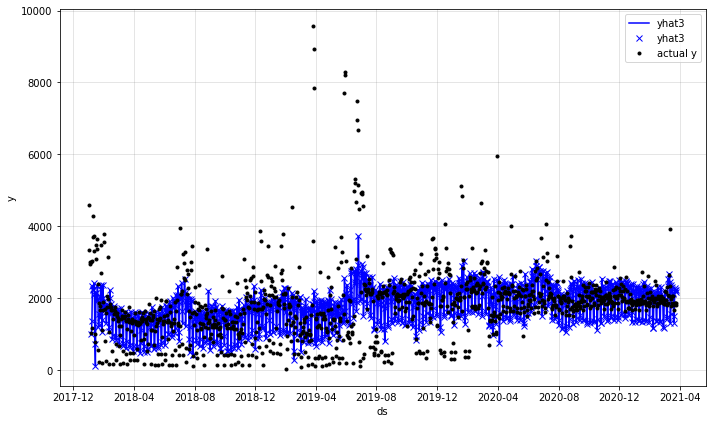

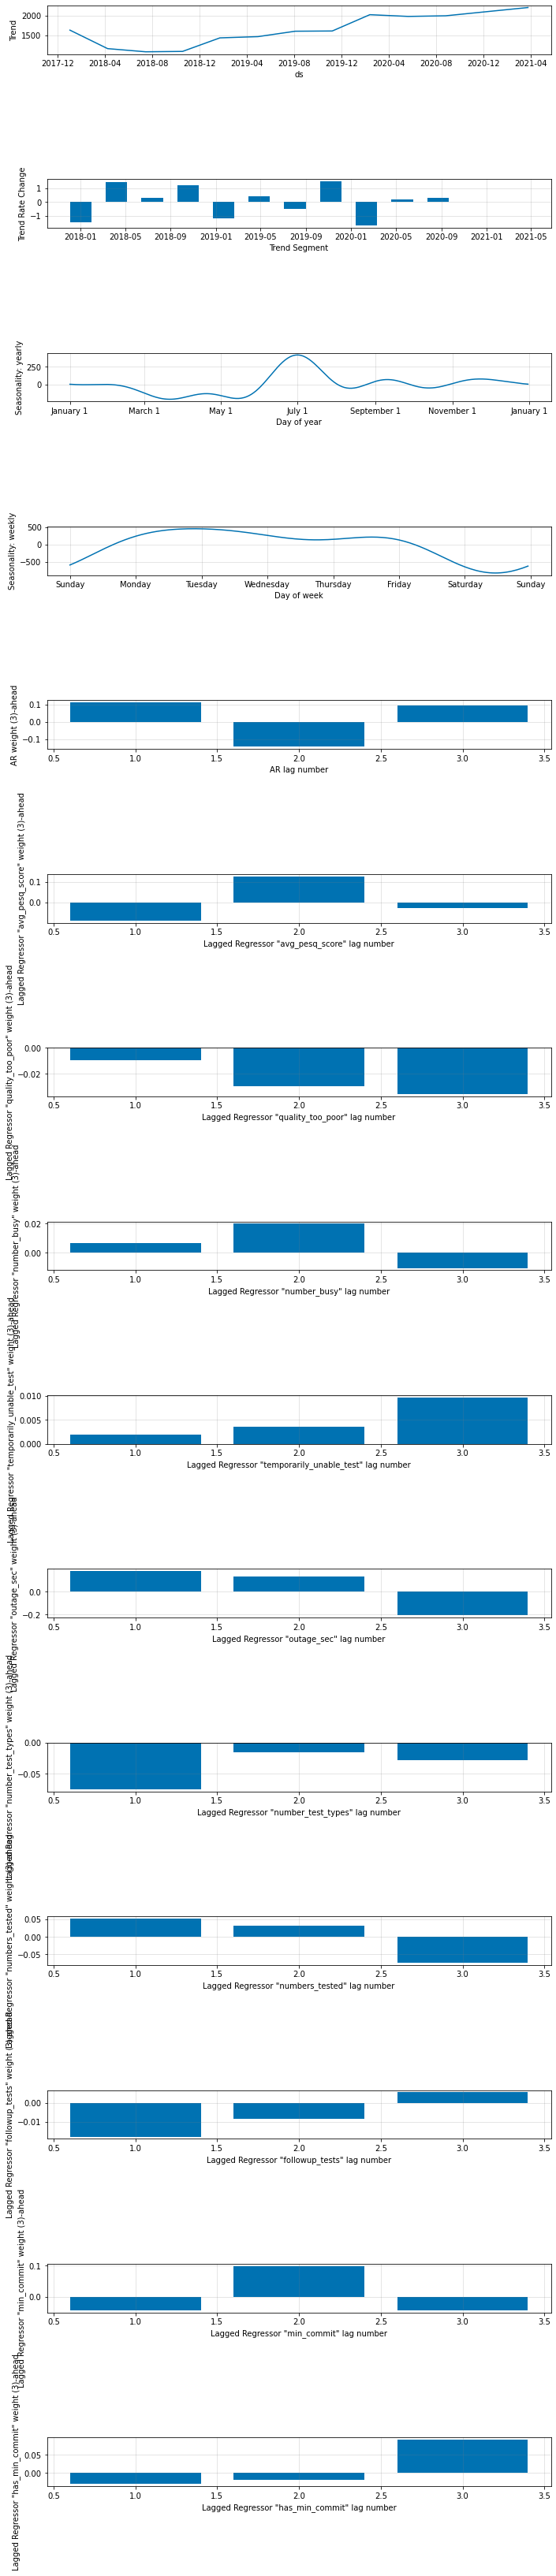

In [ ]:
forecast = model.predict(df)
# print(forecast[])
fig = model.plot(forecast)
# comp = model.plot_components(forecast)
param = model.plot_parameters()